



**Data Exploration**

In [74]:
import random
%matplotlib inline
from matplotlib import style
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score 
from sklearn import preprocessing
from bisect import bisect_left
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import svm

In [75]:
#read dataset
datUse = 1000
longdf = pd.read_csv('salju_test.csv')
longdf2 = pd.read_csv('salju_train.csv')
df = longdf[0:datUse].copy()
df2 = longdf2[0:datUse].copy()
df.shape

(1000, 23)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tanggal                   1000 non-null   object 
 1   KodeLokasi                1000 non-null   object 
 2   SuhuMin                   990 non-null    float64
 3   SuhuMax                   993 non-null    float64
 4   Hujan                     975 non-null    float64
 5   Penguapan                 564 non-null    float64
 6   SinarMatahari             513 non-null    float64
 7   ArahAnginTerkencang       923 non-null    object 
 8   KecepatanAnginTerkencang  924 non-null    float64
 9   ArahAngin9am              938 non-null    object 
 10  ArahAngin3pm              980 non-null    object 
 11  KecepatanAngin9am         985 non-null    float64
 12  KecepatanAngin3pm         985 non-null    float64
 13  Kelembaban9am             977 non-null    float64
 14  Kelembaba

Jenis data Object, Terdapat  6 Fitur yang digunakan pada dataset ini yaitu KodeLokasi, ArahAnginTerkencang, ArahAngin9am, ArahAngin3pm, BersaljuHariIni, dan BersaljuBesok.	

Jenis data Float, ada 17 Fitur yang digunakan pada dataset ini, yaitu : SuhuMin, SuhuMax, Hujan, Penguapan, KecepatanAnginTerkencang, SinarMatahari, KecepatanAngin9am, KecepatanAngin3pm, Kelembaban9am, Kelembaban3pm, Tekanan9am, Tekanan3pm, Awan9am, Awan3pm, Suhu9am, Suhu3pm


In [19]:
#cek null 
pd.isnull(df.head())

,Tanggal,KodeLokasi,SuhuMin,SuhuMax,Hujan,Penguapan,SinarMatahari,ArahAnginTerkencang,KecepatanAnginTerkencang,ArahAngin9am,ArahAngin3pm,KecepatanAngin9am,KecepatanAngin3pm,Kelembaban9am,Kelembaban3pm,Tekanan9am,Tekanan3pm,Awan9am,Awan3pm,Suhu9am,Suhu3pm,BersaljuHariIni,BersaljuBesok
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,True,True,True,False,False,False,False


In [20]:
#kategori fitur
col_num = ['SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','KecepatanAnginTerkencang',
           'KecepatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am'
           ,'Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm']
col_ArahAngin = ['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm']

Tabel di drop, untuk kategori tanggal bersalju hariini dan besok karena data tidak digunakan

In [21]:
df = df.drop(columns=['Tanggal'])
df2 = df2.drop(columns=['id','Tanggal'])

x_train = df2.iloc[:, df2.columns != 'BersaljuBesok']
y_train = df2.iloc[:, df2.columns == 'BersaljuBesok']

x_test = df.iloc[:, df.columns != 'BersaljuBesok']
y_test = df.iloc[:, df.columns == 'BersaljuBesok']



---


#Boxplot

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

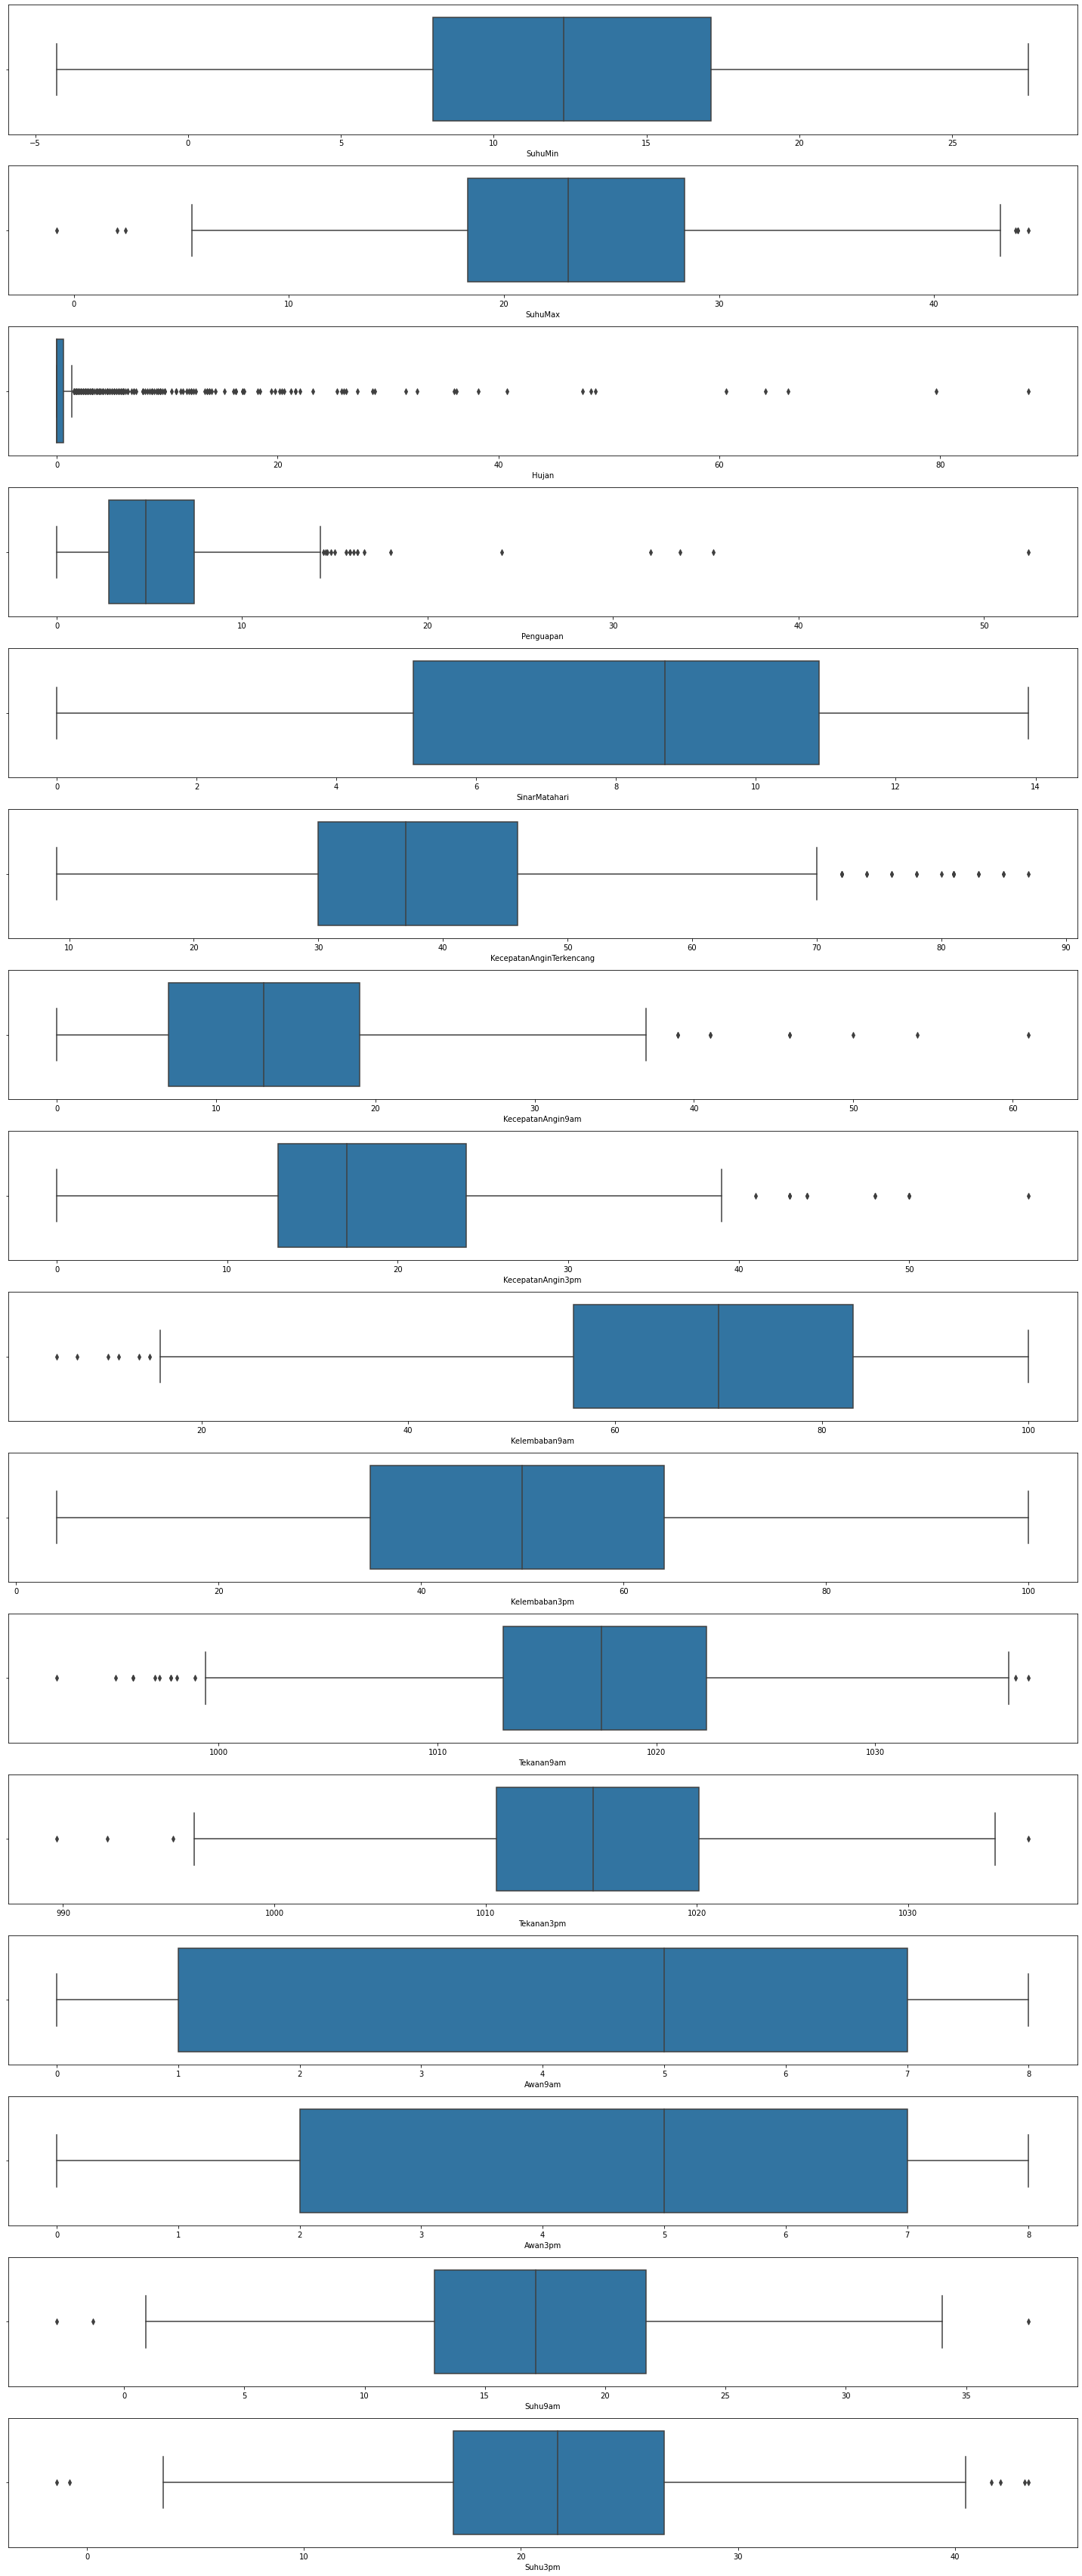

In [22]:
fg = plt.figure(figsize=(20, 50))

for i in range(1, len(col_num)+1):
    x2 = fg.add_subplot(17,1,i)
    sns.boxplot(df[col_num[i-1]], orient='h')
    plt.tight_layout()

#Distribution

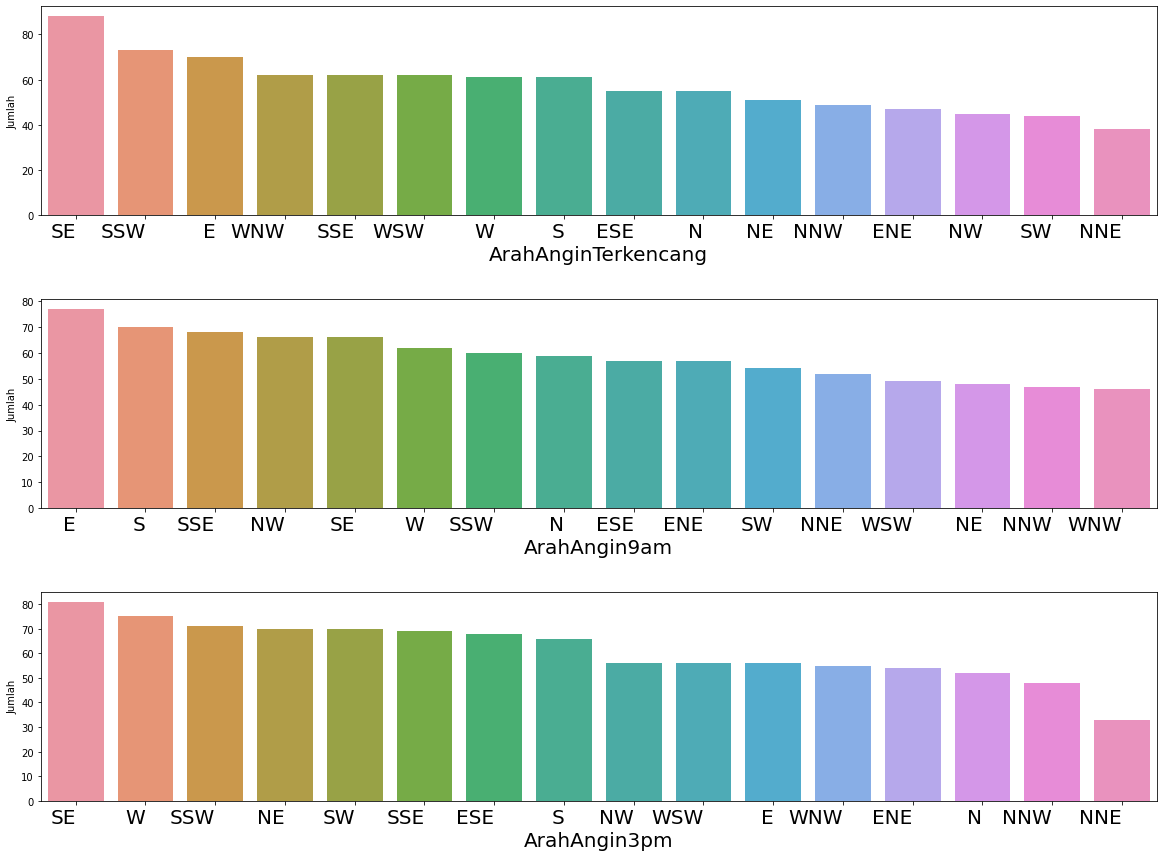

In [13]:
col_ArahAngin_Distribusi = ['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','Lorem ipsum']

def create_count(index):
    vc = df[col_ArahAngin_Distribusi[index]].value_counts().reset_index()
    vc.columns = ['AA', 'Jumlah']
    return vc

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1, len(col_ArahAngin_Distribusi)):
    xx = fig.add_subplot(len(col_ArahAngin_Distribusi), 1, i)
    cc = create_count(i-1)
    
    yy = sns.barplot(x = 'AA', y = 'Jumlah', data = cc)
    yy.set_xlabel(yy.get_xlabel, fontsize=20)
    yy.set_xticklabels(yy.get_xticklabels(), rotation=0, ha="right",fontsize=20);
    plt.xlabel(col_ArahAngin_Distribusi[i-1])

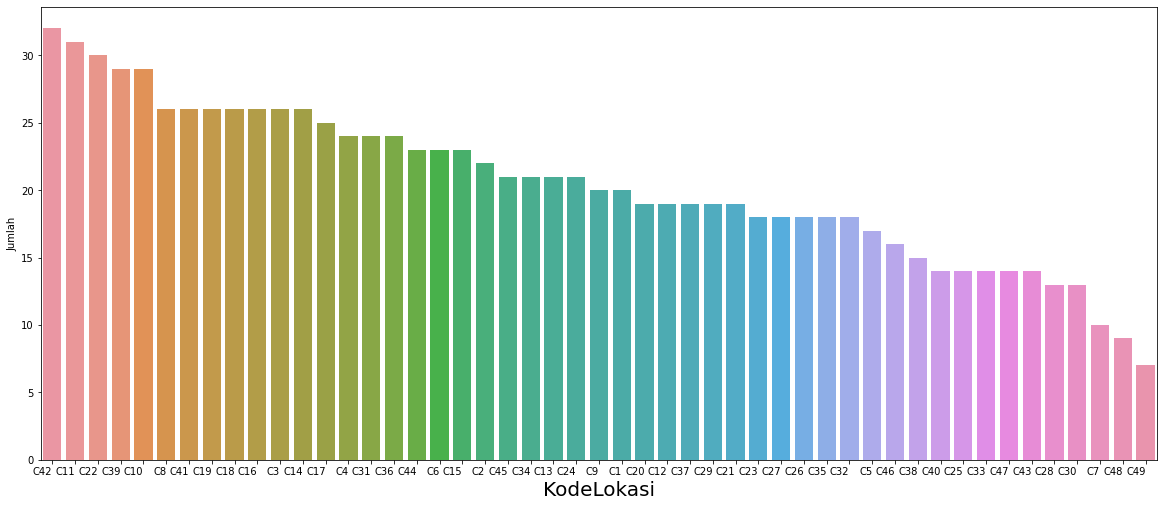

In [11]:
KL = ['KodeLokasi','Lorem ipsum']

def create_count(index):
    vc = df[KL[index]].value_counts().reset_index()
    vc.columns = ['AA', 'Jumlah']
    return vc

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.1)

for i in range(1, len(KL)):
    xx = fig.add_subplot(len(KL), 1, i)
    cc = create_count(i-1)
    
    yy = sns.barplot(x = 'AA', y = 'Jumlah', data = cc)
    yy.set_xlabel(yy.get_xlabel, fontsize=20)
    yy.set_xticklabels(yy.get_xticklabels(), rotation=0, ha="right",fontsize=10);
    plt.xlabel(KL[i-1])

#Heatmap

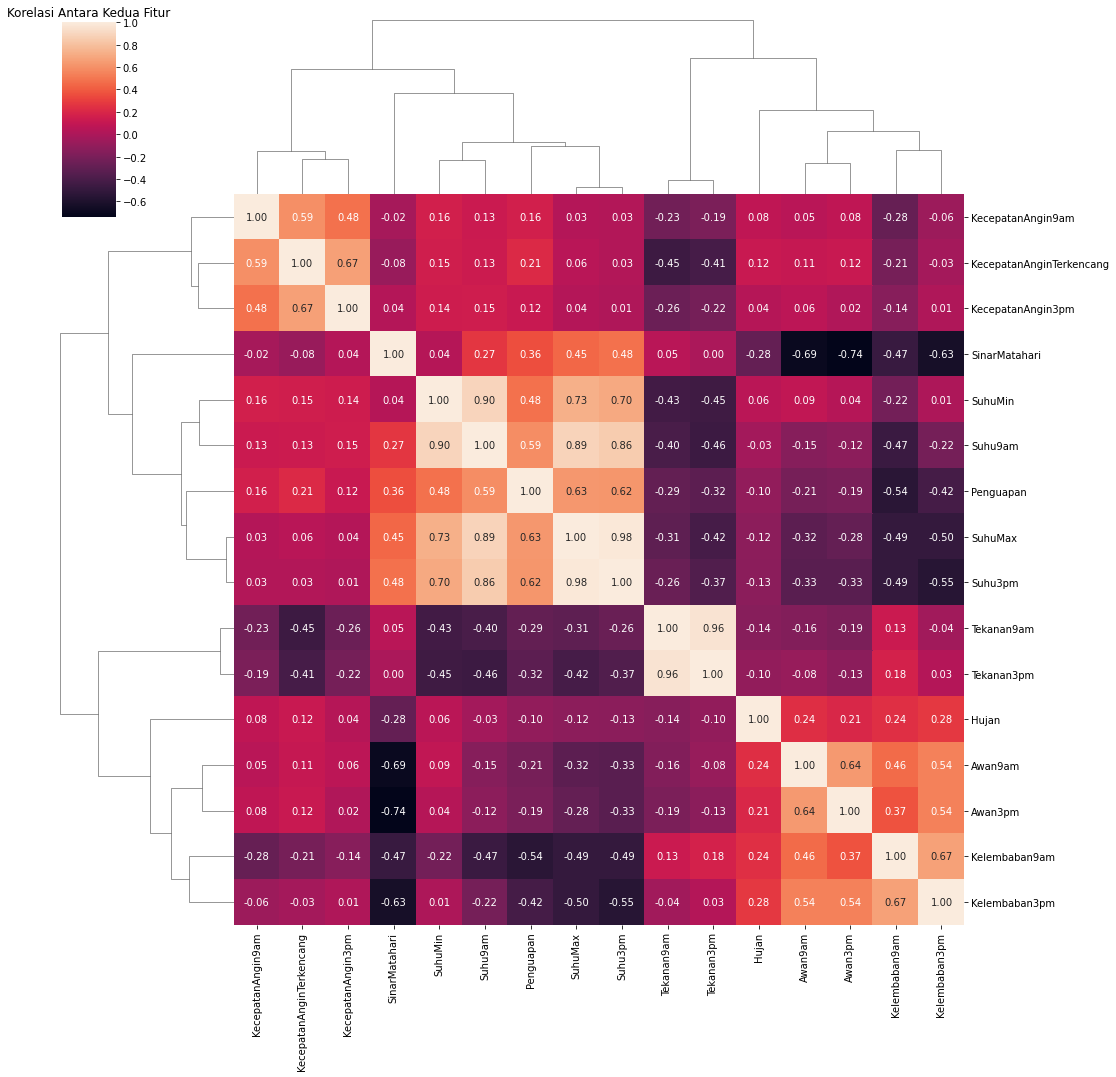

In [24]:
dataset_t = df2.append(df)
corr_matrix = dataset_t.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", figsize=(15,15))
plt.title("Korelasi Antara Kedua Fitur")
plt.show()

# Data Cleansing

In [25]:
#mengetahui jumlah missing value disetiap fitur nya
df.isnull().sum()

KodeLokasi                    0
SuhuMin                      10
SuhuMax                       7
Hujan                        25
Penguapan                   436
SinarMatahari               487
ArahAnginTerkencang          77
KecepatanAnginTerkencang     76
ArahAngin9am                 62
ArahAngin3pm                 20
KecepatanAngin9am            15
KecepatanAngin3pm            15
Kelembaban9am                23
Kelembaban3pm                34
Tekanan9am                  105
Tekanan3pm                  105
Awan9am                     377
Awan3pm                     401
Suhu9am                      16
Suhu3pm                      26
BersaljuHariIni              25
BersaljuBesok                24
dtype: int64

In [28]:
#mengisi null ke Mean 
def fillnull(nameDiagram):
  return df[nameDiagram].fillna(math.ceil(df[nameDiagram].mean()))

df['SuhuMin'] = fillnull('SuhuMin')
df['SuhuMax'] = fillnull('SuhuMax')
df['Hujan'] = fillnull('Hujan')
df['Penguapan'] = fillnull('Penguapan')
df['SinarMatahari'] = fillnull('SinarMatahari')
df['KecepatanAnginTerkencang'] = fillnull('KecepatanAnginTerkencang')
df['KecepatanAngin9am'] = fillnull('KecepatanAngin9am')
df['KecepatanAngin3pm'] = fillnull('KecepatanAngin3pm')
df['Kelembaban9am'] = fillnull('Kelembaban9am')
df['Kelembaban3pm'] = fillnull('Kelembaban3pm')
df['Tekanan9am'] = fillnull('Tekanan9am')
df['Tekanan3pm'] = fillnull('Tekanan3pm')
df['Awan9am'] = fillnull('Awan9am')
df['Awan3pm'] = fillnull('Awan3pm')
df['Suhu9am'] = fillnull('Suhu9am')
df['Suhu3pm'] = fillnull('Suhu3pm')

In [29]:
#mengisi null ke string Arah Angin,Bersalju hari ini dan besok

def fillnull2(nameDiagram):
    return df[nameDiagram].fillna(df[nameDiagram].mode().iat[0])

df['ArahAnginTerkencang'] = fillnull2('ArahAnginTerkencang')
df['ArahAngin9am'] = fillnull2('ArahAngin9am')
df['ArahAngin3pm'] = fillnull2('ArahAngin3pm')
df['BersaljuHariIni'] = fillnull2('BersaljuHariIni')
df['BersaljuBesok'] = fillnull2('BersaljuBesok')

In [30]:
#menghapus value data yang sama
df.drop_duplicates(inplace=True)
for i in col_num:
    q50 = df[i].quantile(0.50)
    q95 = df[i].quantile(0.95)
    df[i] = np.where(df[i] > q95, q50, df[i])

#Export Dataset

In [31]:
df_array = np.array(df)
Listdf = df_array.tolist()
df_array2 = np.array(df2)

In [33]:
import csv

fields = ['Tanggal','KodeLokasi','SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari',
          'ArahAnginTerkencang','Kecepatan','ArahAngin9am','ArahAngin3pm','KecapatanAngin9am',
          'KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm',
          'Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']

rows = df_array

filename = 'Dataset Hasil Eksplorasi salju_test.csv'

with open (filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    for row in rows:
        csvwriter.writerow(row)

In [34]:
import csv

fields = ['Tanggal','KodeLokasi','SuhuMin','SuhuMax','Hujan','Penguapan','SinarMatahari','ArahAnginTerkencang','Kecepatan','ArahAngin9am','ArahAngin3pm','KecapatanAngin9am','KecepatanAngin3pm','Kelembaban9am','Kelembaban3pm','Tekanan9am','Tekanan3pm','Awan9am','Awan3pm','Suhu9am','Suhu3pm','BersaljuHariIni','BersaljuBesok']

rows = df_array2

filename = 'Dataset Hasil Eksplorasi salju_train.csv'

with open (filename, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(fields)
    for row in rows:
        csvwriter.writerow(row)

#Engineering Features 

In [37]:
def getDataSet():
    df = pd.read_csv('salju_test.csv')
    df = df[['Hujan', 'Penguapan', 'SuhuMin', 'SuhuMax']]
    return df

In [38]:
def scallingMinMax(df):
    for x in df:
        a = df[x].max()
        b = df[x].min()
        for y in range(len(df)):
            c = a-b
            z = df[x].values[y] - b
            df[x].iloc[[y]] = z / c
    return pd.DataFrame(df.values, index=df.index, columns=df.columns[:])


**CLUSTERING (Tahap 2A)**






#PLOTTING and MODELLING

In [39]:
class K_Means:
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations

    def fit(self, data):
        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iterations):
            self.classes = {}
            for i in range(self.k):
                self.classes[i] = []

            for features in data:
                distances = [np.linalg.norm(features - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classes[classification].append(features)

            previous = dict(self.centroids)

            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)

            isOptimal = True

            for centroid in self.centroids:

                original_centroid = previous[centroid]
                curr = self.centroids[centroid]

                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False

            if isOptimal:
                break

In [40]:
dataset = df
def normalize(data, i):
    result = (data[i] - data.min())/(data.max() - data.min())
    return result
    
for i in range(0,dataset['SuhuMin'].count()):
    dataset['SuhuMin'][i] = normalize(dataset['SuhuMin'], i)
    
for i in range(0,dataset['SuhuMax'].count()):
    dataset['SuhuMax'][i] = normalize(dataset['SuhuMax'], i)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


#MODELLING FIGURE(2D)

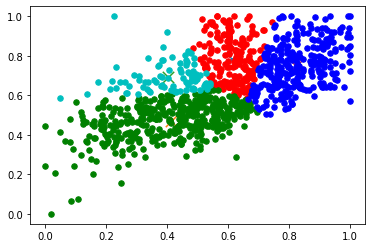

In [63]:
dataset = dataset[['SuhuMin', 'SuhuMax']]
df = dataset.astype(float).values.tolist()

X = dataset.values #returns a numpy array

km = K_Means(4)
km.fit(X)

# Start Plot
colors = 10*["r", "g", "c", "b", "k"]

for centroid in km.centroids:
    plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

res = []
for classification in km.classes:
    color = colors[classification]
    for features in km.classes[classification]:
        res.append(color)
        plt.scatter(features[0], features[1], color = color,s = 30)

plt.show()

#Plotting Eksperimen 3D

Centroid Helper

In [42]:
df_try = pd.read_csv('salju_test.csv')

In [46]:
#mengisi null ke mean

def fillnull(nameDiagram):
  return df_try[nameDiagram].fillna(math.ceil(df_try[nameDiagram].mean()))

df_try['SuhuMin'] = fillnull('SuhuMin')
df_try['SuhuMax'] = fillnull('SuhuMax')
df_try['Hujan'] = fillnull('Hujan')
df_try['Penguapan'] = fillnull('Penguapan')
df_try['SinarMatahari'] = fillnull('SinarMatahari')
df_try['KecepatanAnginTerkencang'] = fillnull('KecepatanAnginTerkencang')
df_try['KecepatanAngin9am'] = fillnull('KecepatanAngin9am')
df_try['KecepatanAngin3pm'] = fillnull('KecepatanAngin3pm')
df_try['Kelembaban9am'] = fillnull('Kelembaban9am')
df_try['Kelembaban3pm'] = fillnull('Kelembaban3pm')
df_try['Tekanan9am'] = fillnull('Tekanan9am')
df_try['Tekanan3pm'] = fillnull('Tekanan3pm')
df_try['Awan9am'] = fillnull('Awan9am')
df_try['Awan3pm'] = fillnull('Awan3pm')
df_try['Suhu9am'] = fillnull('Suhu9am')
df_try['Suhu3pm'] = fillnull('Suhu3pm')

def fillnull2(nameDiagram):
    return df_try[nameDiagram].fillna(df_try[nameDiagram].mode().iat[0])

df_try['ArahAnginTerkencang'] = fillnull2('ArahAnginTerkencang')
df_try['ArahAngin9am'] = fillnull2('ArahAngin9am')
df_try['ArahAngin3pm'] = fillnull2('ArahAngin3pm')
df_try['BersaljuHariIni'] = fillnull2('BersaljuHariIni')
df_try['BersaljuBesok'] = fillnull2('BersaljuBesok')

df_try.drop_duplicates(inplace=True)
for i in col_num:
    q50 = df_try[i].quantile(0.50)
    q95 = df_try[i].quantile(0.95)
    df_try[i] = np.where(df_try[i] > q95, q50, df_try[i])

In [47]:
df_try.isnull().sum()

Tanggal                     0
KodeLokasi                  0
SuhuMin                     0
SuhuMax                     0
Hujan                       0
Penguapan                   0
SinarMatahari               0
ArahAnginTerkencang         0
KecepatanAnginTerkencang    0
ArahAngin9am                0
ArahAngin3pm                0
KecepatanAngin9am           0
KecepatanAngin3pm           0
Kelembaban9am               0
Kelembaban3pm               0
Tekanan9am                  0
Tekanan3pm                  0
Awan9am                     0
Awan3pm                     0
Suhu9am                     0
Suhu3pm                     0
BersaljuHariIni             0
BersaljuBesok               0
dtype: int64

In [48]:
def initCentroid(df_try, k):
    np.random.seed(90)
    centroids = {
      i+1: df_try.iloc[np.random.randint(0, len(df_try))].values
      for i in range(k)
    }
    return centroids

In [49]:
def calculateDistance(df_try, centroid):
    for i in centroid.keys():
        df_try['c{}'.format(i)] = (
          np.sqrt(
                (df_try['Hujan'] - centroid[i][0])**2
              + (df_try['Penguapan'] - centroid[i][1])**2
              + (df_try['SuhuMin'] - centroid[i][2])**2
              + (df_try['SuhuMax'] - centroid[i][3])**2              
          )
        )
        
    listLabels = []
    for x in range(len(df_try)):
        if (df_try['c1'].values[x] <= df_try['c2'].values[x] and df_try['c1'].values[x] <= df_try['c3'].values[x]):
            listLabels.append('c1')
        elif (df_try['c2'].values[x] <= df_try['c1'].values[x] and df_try['c2'].values[x] <= df_try['c3'].values[x]):
            listLabels.append('c2')
        else:
            listLabels.append('c3')
    df_try['label'] = np.array(listLabels)
      
    return df_try

def updateCentroid(df_try, centroid):
    for i in centroid.keys():
        df_try_temp = df_try[df_try['label'] == 'c{}'.format(i)]
        df_try_temp = df_try_temp[['Hujan', 'Penguapan', 'SuhuMin', 'SuhuMax']]
        centroid[i] = np.array(df_try_temp.mean(axis = 0))
        df_try_temp.iloc[0:0]
    return centroid

In [50]:
def output(df_try):
    listDistanceClosest = []
    for x in range(len(df_try.values)):
        if (df_try['label'].values[x] == '1'):
            listDistanceClosest.append(df_try['c1'].values[x])
        elif (df_try['label'].values[x] == '2'):
            listDistanceClosest.append(df_try['c2'].values[x])
        else:
            listDistanceClosest.append(df_try['c3'].values[x])

    return listDistanceClosest

In [51]:
#set program
k = 3
df_try_dataset  = getDataSet()
df_try_preprocessing = scallingMinMax(df_try_dataset)
centroids = initCentroid(df_try_preprocessing, k)
df_try_Distance = calculateDistance(df_try_preprocessing, centroids)
while True:
    label_data = df_try_Distance['label'].copy(deep=True)
    centroids = updateCentroid(df_try_Distance, centroids)
    df_try_Distance = calculateDistance(df_try_Distance, centroids)
    if (label_data.equals(df_try_Distance['label'])):
        break

df_try_Distance['label'].replace(to_replace=['c1','c2','c3'],value=[1,2,3],inplace=True)
df_try_output = df_try_Distance[['label']]
df_try_output['distance_closest'] = np.array(output(df_try_Distance))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [53]:
df_array_try = np.array(df_try_output)
Listdf_try = df_array_try.tolist()
print(df_array_try)

[[3.                nan]
 [3.                nan]
 [3.         0.11005463]
 ...
 [3.                nan]
 [3.         0.08506659]
 [3.                nan]]


In [54]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

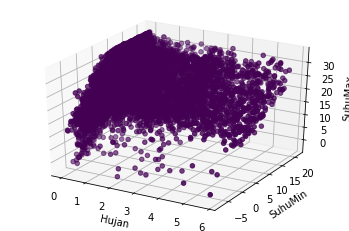

In [55]:
fg = plt.figure()
x2 = fg.add_subplot(111,projection='3d')

x =df_try['Hujan']
y =df_try['SuhuMin']
z =df_try['SuhuMax']

x2.scatter(x, y, z, c=df_try_Distance['label'], marker='o')

x2.set_xlabel('Hujan')
x2.set_ylabel('SuhuMin')
x2.set_zlabel('SuhuMax')
plt.show()

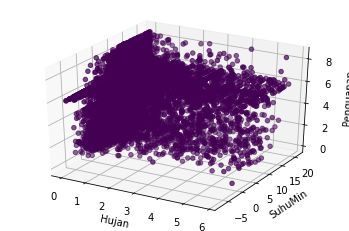

In [56]:
#Experiment

fg = plt.figure()
x2 = fg.add_subplot(111, projection='3d')

x =df_try['Hujan']
y =df_try['SuhuMin']
z =df_try['Penguapan']

x2.scatter(x, y, z, c=df_try_Distance['label'], marker='o')

x2.set_xlabel('Hujan')
x2.set_ylabel('SuhuMin')
x2.set_zlabel('Penguapan')

plt.show()


**Klasifikasi(2B)**


In [70]:
from sklearn import metrics
from sklearn import svm

In [ ]:
def encode(name):
    test = df2[name].astype('category')
    run = test.cat.codes
    return run

list_desc = ['ArahAnginTerkencang','ArahAngin9am','ArahAngin3pm','BersaljuHariIni','BersaljuBesok','KodeLokasi']

for i in range(0,6):
    df2[list_desc[i]] = encode(list_desc[i])
    df[list_desc[i]] = encode(list_desc[i])

In [ ]:
	x_train = df2.iloc[:, df2.columns != 'BersaljuBesok']
	y_train = df2.iloc[:, df2.columns == 'BersaljuBesok']

	x_test = df.iloc[:, df.columns != 'BersaljuBesok']
	y_test = df.iloc[:, df.columns == 'Bersaljubesok']
	x_train.head

In [71]:
#algoritma klasifikasi
	def predict(x_test, clf_object):
		y_pred = clf_object.predict(x_test)
		return y_pred

	def trainKNN(x_train, y_train, K):
		clf = KNeighborsClassifier(n_neighbors=K)
		clf.fit(x_train, y_train)
		return clf

#calculate accuracy
	def accuracy(y_test,y_pred):
		print("Matrix Confusion: ", matrix_confusion(y_test, y_pred))
		print("Accuracy: ", score_accuracy(y_test, y_pred)*100)
		print("report : ", report(y_test, y_pred))

In [ ]:
clfKNN = trainKNN(x_train, y_train, 5)
y_predKNN = predict(x_test, clfKNN)
accuracy(y_test, y_predKNN)